## Introduction

In the "Scatter Plots and Correlation" lesson, we learned more about exploratory data visualization. We worked with time series data on bike sharing and learned about seasonality, scatter plots, and correlation.

In this lesson, we'll learn new things about exploratory data visualization. We'll continue using the bike sharing dataset:

Recall that the workingday column describes the type of day: a working day or a non-working day (weekend or holiday). A value of 1 represents a working day, and a value of 0 represents a non-working day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bike_sharing = pd.read_csv('../../Datasets/day.csv')

In [3]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

In [4]:
bike_sharing['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

The workingday column correlates negatively with the casual column and positively correlates with the registered column (recall that the casual and registered columns show us the number of bikes rented by casual and registered users each day).

In [7]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

These values suggest that registered users tend to use the bikes more on working days — to commute to work probably. On the other side, casual users tend to rent the bikes more on the weekends and holidays — probably for some leisure time.

To corroborate or disprove these observations, we'll calculate the average number of rentals for casual and registered users on working and non-working days.

In [8]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


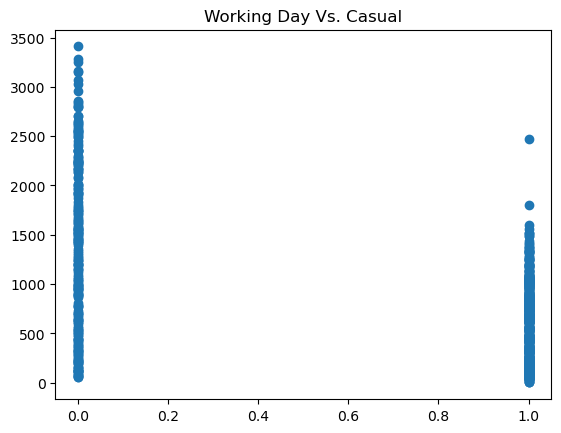

In [11]:
plt.scatter(bike_sharing['workingday'], bike_sharing['casual'])
plt.title('Working Day Vs. Casual')
plt.show()

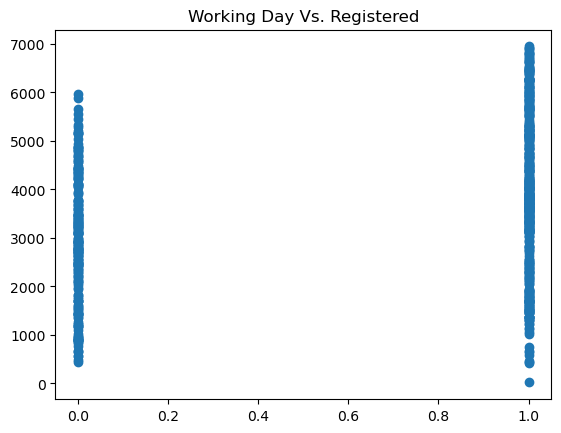

In [13]:
plt.scatter(bike_sharing['workingday'], bike_sharing['registered'])
plt.title('Working Day Vs. Registered')
plt.show()

## Bar Plots

We found a pattern that is potentially true: registered users tend to use the bikes more on the working days, while casual users tend to rent the bikes more on the weekends and holidays.

We corroborated this hypothesis with the average number of rentals we see for casual and registered users on working and non-working days:

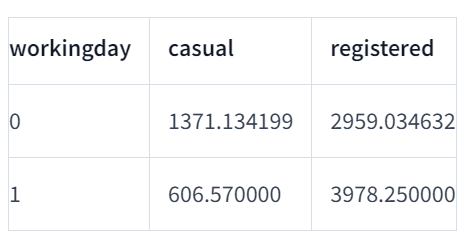

On non-working days, casual users rent on average more than double the number of bikes they rent on working days: 1,371 bikes compared to 607 bikes.

Conversely, registered users rent significantly less during non-working days: 2,959 compared to 3,978 bikes.

This can be useful business information. For instance, the marketing team can come up with more targeted membership offers. They can experiment with an annual holiday-and-weekend subscription to see if this increases conversion rates among casual users.

To get a visual estimate of the data in our table above, we can use a bar plot (also called a bar chart).

For instance, this is how the bar plot for the casual users averages looks — we can generate a bar plot using the [plt.bar() function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html):

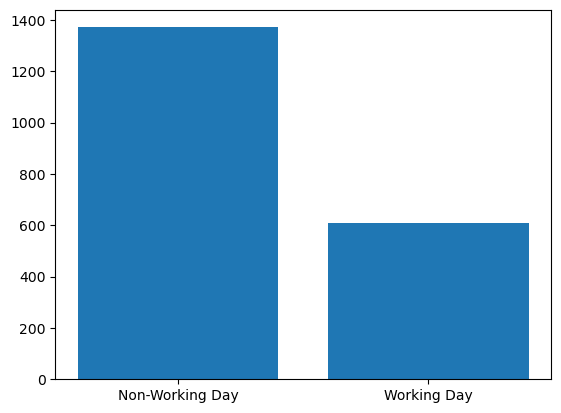

In [16]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]
plt.bar(working_days, casual_avg)
plt.show()

In our bar plot above, we see two vertical blue bars. The bar on the left corresponds to the non-working day category, and the one on the right to the working day category.

The bar on the left is higher — it's more than twice as tall as the one on the right. That's because on non-working days casual users rent on average more than double the number of bikes they rent on working days.

The height of each bar corresponds to the values in the casual_avg list — the left bar corresponds to the value 1,371, and the right one corresponds to 607. Essentially, the height is a y-coordinate.

We pass the heights of the bars as the second argument in `plt.bar(x, height)`. The first parameter, x, specifies the x-coordinates, and it works equally well with both numbers and strings (Matplotlib handles the strings behind the curtains). Below, we see an example with numbers:

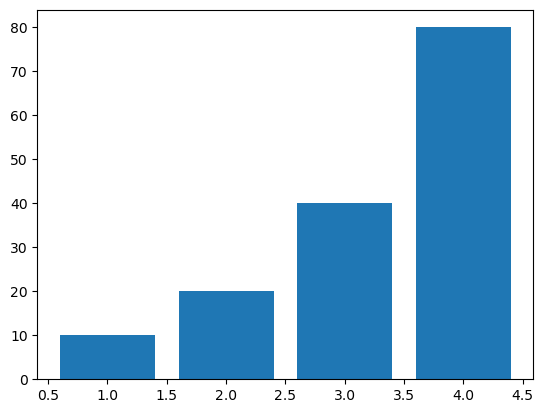

In [17]:
plt.bar(x=[1,2,3,4], height=[10,20,40,80])
plt.show()

Let's now generate a bar plot for the averages associated with registered users.

  Let's now generate a bar plot for the averages associated with registered users.

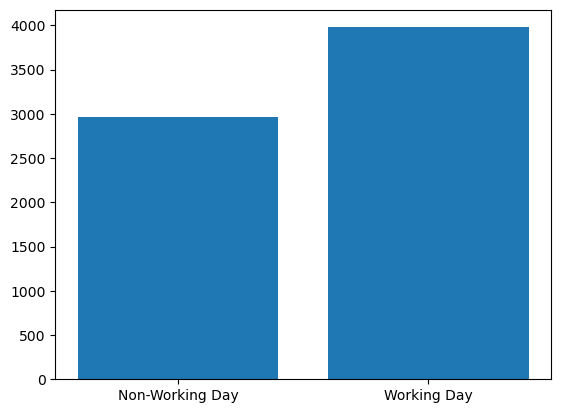

In [18]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

## Customizing Bar Plots

We saw that the data indicates that registered users tend to use the bikes more on working days, while casual users tend to rent the bikes more on weekends and holidays.

We can also take a more granular approach to analyzing the data and examine the average number of rentals for casual and registered users based on the day of the week (Monday, Tuesday, Wednesday, etc.).

The weekday column in our dataset describes the day of the week (0 is Sunday, and 6 is Saturday):

In [19]:
bike_sharing['weekday'].value_counts().sort_index()
# We use Series.sort_index() to sort the index in ascending order

weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

Based on the weekday column, we already calculated the averages behind the curtains and added them to the table below:



Based on the weekday column, we already calculated the averages behind the curtains and added them to the table below:

In [39]:
weekday_averages = bike_sharing.groupby('weekday')[['casual', 'registered']].mean().reset_index()
weekday_averages

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


Notice that we now have seven rows in the table, and it's a bit harder to compare all the values. We can use a bar plot to help us get a visual estimate of the differences instead of going over values one-by-one and performing mental subtractions.

Below, we generate a bar plot for the casual column in our table above. In the code below, assume the weekday_averages variable is a DataFrame storing the table above:

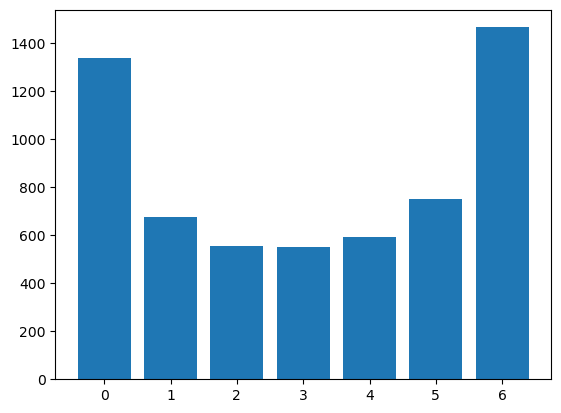

In [28]:
plt.bar(weekday_averages['weekday', weekday_averages['casual'])
plt.show()

The first bar (Sunday) and the last one (Saturday) are more than twice as tall as all the other bars. This shows that casual users rent more bikes on the weekends, which corroborates our initial findings.

If we look at the x-tick labels, we only see numbers (from 0 to 6). If we wanted to add day names instead, we can use the [plt.xticks() function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html). The ticks parameter takes in the x-coordinates, and the labels parameter takes in the corresponding new labels:

Some of the x-tick labels are now overlapping. One thing we can do is leverage the rotation parameter we learned about in the first lesson:

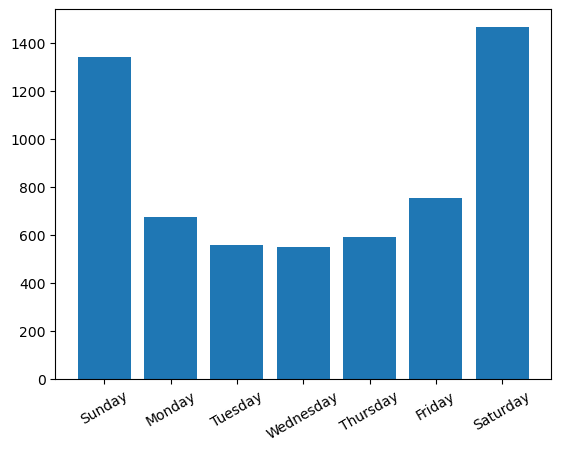

In [33]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

Another solution is to flip all the bars horizontally.

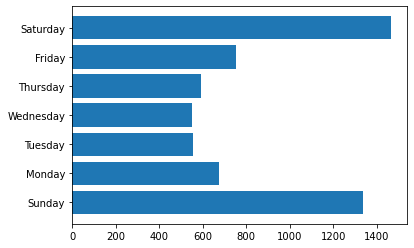

We call this a horizontal bar plot. The average numbers of bikes rented are now on the x-axis, and the day names are on the y-axis. And we're now talking about bar widths instead of bar heights.

To generate the bar plot above, we can use the [plt.barh(y, width)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html) function along with the plt.yticks() function to change the y-tick labels:

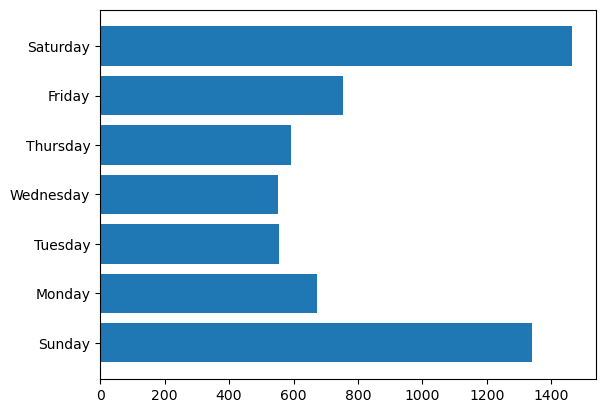

In [36]:
plt.barh(weekday_averages['weekday'], weekday_averages['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

Let's now generate a vertical bar plot for the registered column.

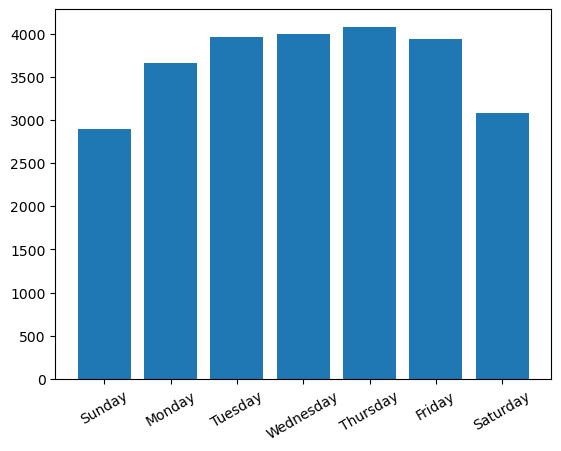

In [46]:
plt.bar(weekday_averages['weekday'], weekday_averages['registered'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation=30)
plt.show()

## Frequency Tables

Our dataset describes bike sharing activity for the Capital Bikeshare company in Washington, D.C. Let's say the company has decided to open up a new bike sharing system in another American city.

Weather patterns are going to play an important part in choosing the next location. We're asked to pull up some weather data about Washington, D.C. — the decision-making team wants to use that as a benchmark for evaluating other cities.

One useful column is weathersit, which describes the daily weather type. Let's look at the unique values and the number of times each occurs:

In [47]:
bike_sharing['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

We only see three unique values above, but, according to the documentation, the weathersit column has four unique values (4 has a frequency of zero as a consequence):

- 1: clear or few clouds
- 2: mist or cloudy
- 3: light rain, light snow, thunderstorm
- 4: heavy rain, snow, ice pellets, fog

The output of bike_sharing['weathersit'].value_counts() lists all the unique values along with the number of times each unique value occurs.

We call the number of times that a unique value occurs the frequency. And we call the output of bike_sharing['weathersit'].value_counts() a frequency table.



More generally, the Series.value_counts() method returns a frequency table. The best way to visualize a frequency table is by using a bar plot.

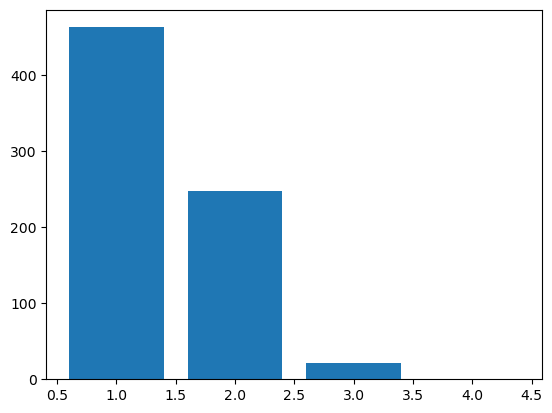

In [48]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

Bar plots work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.

Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram — a graph type that we'll learn about later in this lesson.

For our next exercise, we're going to visualize weather patterns in Washington, D.C. for 2011 and 2012 individually. This will help us see if the weather is consistent from year to year.

In [59]:
unique_values = bike_sharing['weathersit'].value_counts()
unique_values

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [60]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
bike_sharing['year'] = bike_sharing['dteday'].dt.year

In [67]:
bike_sharing[bike_sharing['year'] == 2011]['weathersit'].value_counts()

weathersit
1    226
2    124
3     15
Name: count, dtype: int64

In [68]:
bike_sharing[bike_sharing['year'] == 2012]['weathersit'].value_counts()

weathersit
1    237
2    123
3      6
Name: count, dtype: int64

In [69]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

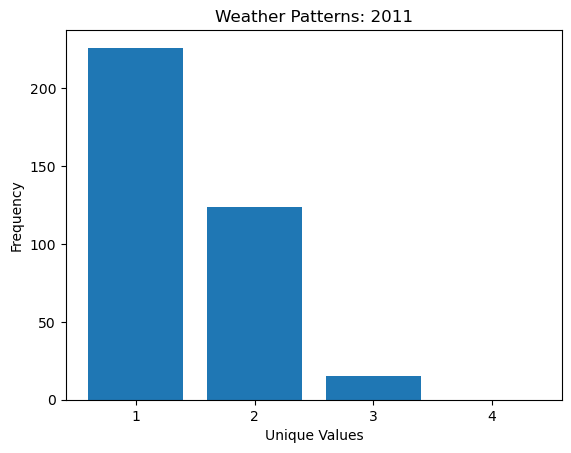

In [74]:
plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1, 2, 3, 4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

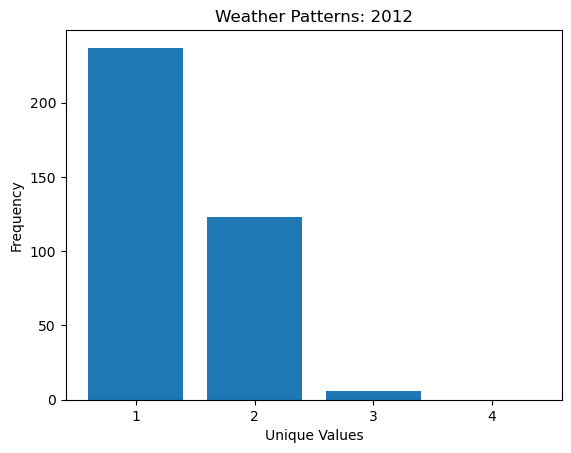

In [73]:
plt.bar(unique_values, weather_2012)
plt.xticks(ticks=[1, 2, 3, 4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

## Grouped Frequency Tables

On the previous screen, we generated a frequency table for the weathersit column.

In [75]:
bike_sharing['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

The table is fairly straightforward to read and interpret. For most days (463 days), the sky is clear or has a few clouds. However, there are also days (247 days) where we see mist or the sky is cloudy.

Quite rarely (21 days in two years), we have light rains, light snows, or thunderstorms. Also, heavy rains or snows are extremely rare in Washington, D.C. (no occurrences in 2011 and 2012).

However, if we generate a frequency table for the cnt column (which describes the total number of bike rentals), it's almost impossible to distinguish any pattern. And that's because cnt has 696 unique values (below, we see a truncated table).

In [76]:
bike_sharing['cnt'].value_counts()

cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: count, Length: 696, dtype: int64

In [77]:
bike_sharing['cnt'].value_counts(bins=10)

cnt
(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: count, dtype: int64

The unique values are now number intervals. (4368.0, 5237.2] is a number interval. The ( character indicates that the starting number is not included, while the ] indicates that the ending number is included. The interval (4368.0, 5237.2] contains all numbers greater than 4368.0 and less than or equal to 5237.2.

We can better understand the structure of the table above if we sort the intervals in ascending order.

In [78]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

cnt
(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: count, dtype: int64

With a quick look at the table, we can make a few observations:

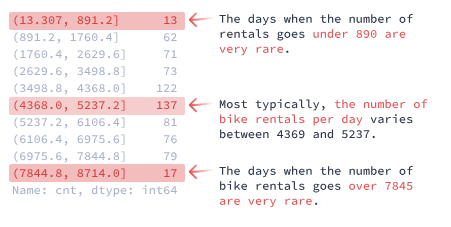

As a side note, the number of intervals in a grouped frequency table can vary — we can have 5, 6, 7, 10, 15, etc. Generally, 10 intervals is a good choice because it offers a good balance between information and comprehension. We'll learn more about this topic later in the statistics courses.

For our next exercise, we're going to generate grouped frequency tables for the registered and casual columns. On the next screen, we'll learn a new kind of graph that we can use to visualize grouped frequency tables.

Generate a grouped frequency table for the registered column.

In [81]:
bike_sharing['registered'].value_counts(bins=10).sort_index()

registered
(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: count, dtype: int64

In [82]:
bike_sharing['casual'].value_counts(bins=10).sort_index()

casual
(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: count, dtype: int64

##  Histograms

On the last screen, we generated a grouped frequency table for the cnt column:

In [83]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

cnt
(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: count, dtype: int64

The best way to visualize a grouped frequency table is by using a histogram. To generate a histogram for our table above, we can use the [lt.hist() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html):

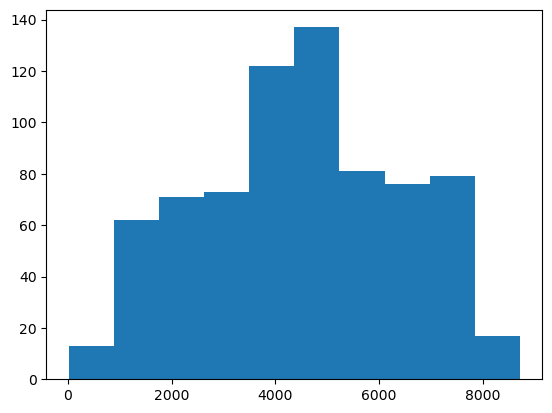

In [84]:
plt.hist(bike_sharing['cnt'])
plt.show()

Notice that all we needed to pass to plt.hist() was the cnt column (not the grouped frequency table).

Behind the curtains, the plt.hist() function did the following:

- Generated a grouped frequency table with ten equal intervals for the cnt column.

- Plotted a bar for each interval (ten intervals means ten bars). The height of each bar corresponds to the frequency of its corresponding interval.

A histogram is a modified bar plot — the main visual difference is that there are no gaps between bars.

Another equally-important difference is that each bar represents an interval, not a single value.

Looking at the histogram we generated for the cnt column, we can make a few quick observations about the following:

Range: Over the two years (2011 and 2012), the values ranged between 0 and 9,000 bike rentals.

The distribution of the bike rentals:

- Most typically, the number of bike rentals per day varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.
- For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.
- Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.

Histograms are one of the most common graphs we use in exploratory data visualization. They quickly show us the distribution of the values, which in turn can suggest important patterns 

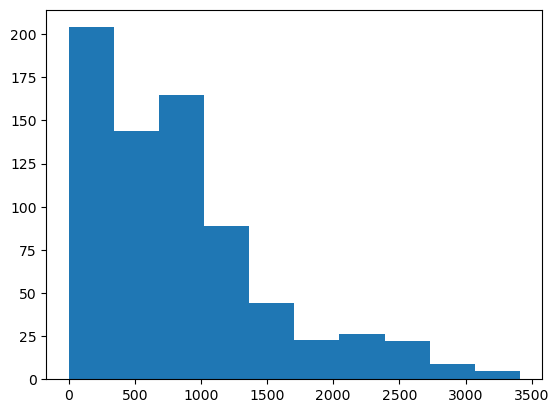

In [86]:
plt.hist(bike_sharing['casual'])
plt.show()

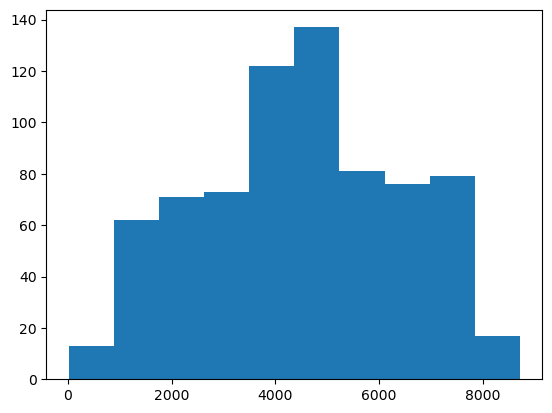

In [87]:
plt.hist(bike_sharing['cnt'])
plt.show()

## The Normal Distribution

On the previous screen, we started by generating a histogram for the cnt column. Then, we plotted a histogram for the casual column in the exercise. Notice that the two histograms have different shapes:

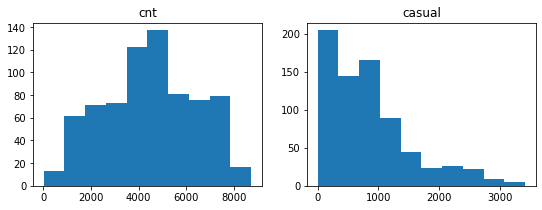

It's useful to examine the shape of a histogram because it shows us the distribution of the values.

We often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide the histogram in two halves that are mirror images of one another.

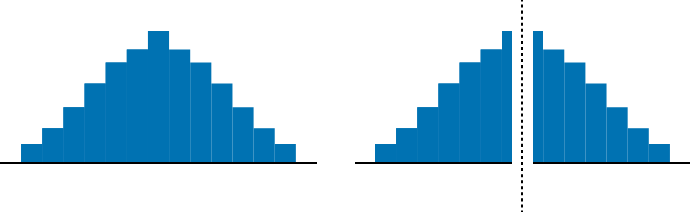

A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a symmetrical distribution.

One common symmetrical distribution is the normal distribution (also called Gaussian distribution).

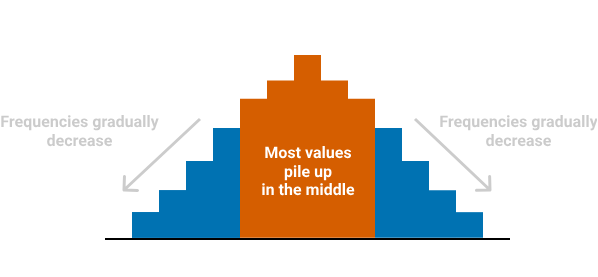

Let's think of a numerical column for a moment (like the cnt column): it has a minimum value, a maximum value, and a range (the range is the difference between the maximum and the minimum column). If we plot a histogram for this column and the visual result is a normal distribution, then this means the following:

- Most of the values in that column lie in the middle of the range.
- As we approach the minimum and the maximum points of the range, we have less and less of those values.

To better understand what a normal distribution means, let's say we plotted a histogram with the grades students earned on a math test. If the histogram shows a normal distribution, then this means the following:

- Most of the student performances were average (lying somewhere in the middle between the minimum and the maximum marks).

- As we approach the minimum and maximum marks, we have less and less students with those performances.

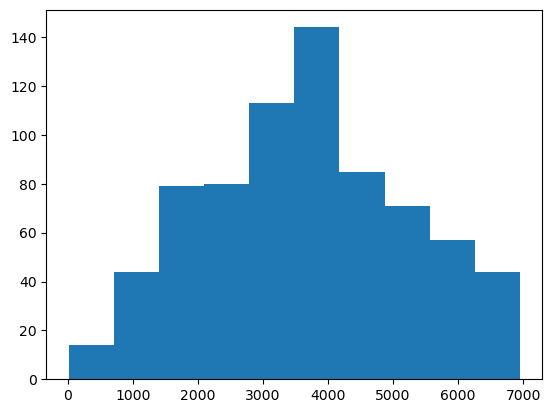

In [88]:
plt.hist(bike_sharing['registered'])
plt.show()

## The Uniform Distribution

On the previous screen, we introduced the normal distribution as an example of a symmetrical distribution.

Another symmetrical distribution we can see in practice is the uniform distribution — the values are uniformly distributed. The bars have equal height because the intervals have equal frequencies.

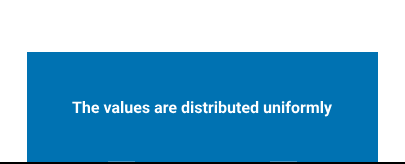

If we plotted a histogram for the grades students earned on a math test, and the distribution is uniform, this means that all the marks (or the mark intervals) have the same frequency.

When we plot histograms in practice, we rarely see perfectly symmetrical distributions. However, these ideal cases we learned about serve as a baseline to help us describe and interpret the distributions we see in practice.

For instance, if we look at the histograms for the cnt and the registered columns, we can say they look similar to a normal distribution. This immediately tells us that most values lie in the middle, and the frequencies gradually decrease toward the extremities.

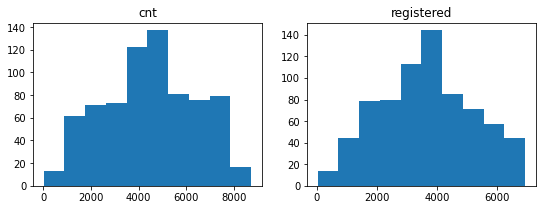

## Skewed Distributions

On the previous two screens, we learned about symmetrical distributions. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide it into two halves that are mirror images of one another.

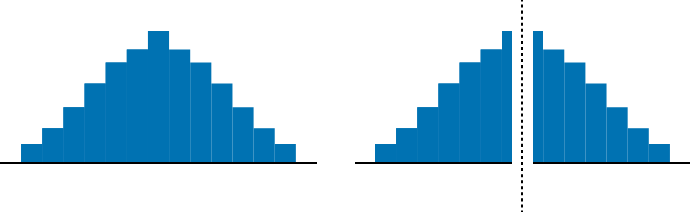

Not all histogram shapes are symmetrical though. The histogram of the casual column, for instance, shows a cluster of tall bars located on the left side of the x-axis.

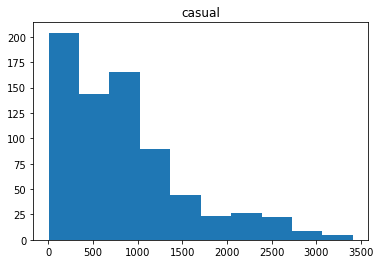

The casual histogram shows a skewed distribution. In a skewed distribution, we see the following:

- The values pile up toward the end or the starting point of the range, making up the body of the distribution.
  - In the case of the casual histogram, the values pile up toward the starting point of the range.

Then the values decrease in frequency towards the opposite end, forming the tail of the distribution.

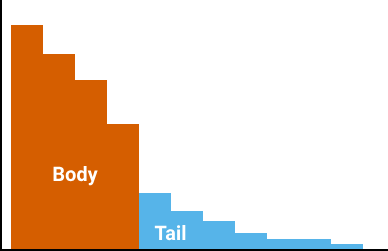

If the tail points to the right, then the distribution is right skewed (the distribution of the casual column is right skewed). If the tail points to the left, then the distribution is said to be left skewed.

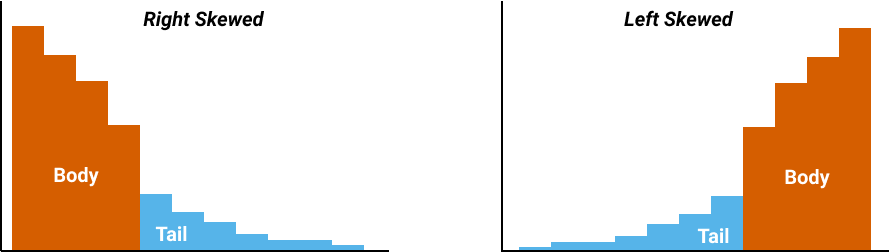

When the tail points to the left, it also points in the direction of negative numbers (on the x-axis, the numbers decrease from right to left). For this reason, a left-skewed distribution is sometimes also said to have a negative skew.

When the tail points to the right, it also points in the direction of positive numbers. As a consequence, right-skewed distributions are also said to have a positive skew.

In this lesson, we continued focusing on exploratory data visualization. We learned the following:

- How to visualize frequency tables with bar plots and histograms.
- How to plot and customize bar plots (vertical and horizontal) with Matplotlib
- How to plot and customize histograms with Matplotlib
- How to interpret bar plots and histograms.
- Some common distribution types:
  - Symmetrical: normal and uniform
  - Skewed: left and right skewed